#### 사금융 기관에서 개인에게 돈을 빌려주면 값을지 안값을지를 예측합니다

In [2]:
import pandas  as pd


In [167]:
df = pd.read_csv('C:/Users/student/Downloads/NH_ML/datasets/application_train.csv/application_train.csv')
df.shape

(307511, 122)

In [6]:
#df.iloc[:1000].to_csv('C:/Users/student/Downloads/NH_ML/datasets/default')

In [7]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df.isna().sum().max(), len(df), df.isna().sum().max()/len(df)

(214865, 307511, 0.6987229725115525)

In [70]:
cond = df.isna().sum() > 200000 # 누락이 20만 건이 넘으면
cond.mean()

0.13114754098360656

In [168]:
df = df.dropna(axis=1, thresh=300000) # 값이 x 개 이상 있는 컬럼만 남기기 
df.shape

(307511, 65)

In [ ]:
#df = df.dropna(axis=0, thresh=120) # 값이 x 개 이상 있는 행만 남기기 
#df.shape

In [ ]:
df.isna().sum().sort_values().tail()

In [169]:
df = df.dropna()
df.shape, df.isna().sum().sum() # 누락 데이터 정리 끝

((304531, 65), 0)

In [161]:
df = df.drop(columns='SK_ID_CURR')

In [131]:
df.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [129]:
df.select_dtypes('object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [163]:
df.groupby(['CODE_GENDER','NAME_FAMILY_STATUS']).mean()

TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
CODE_GENDER NAME_FAMILY_STATUS                                               
F           Civil marriage        0.084354      0.412194     161347.450169   
            Married               0.068132      0.474220     154590.281248   
            Separated             0.067633      0.334378     166089.527615   
            Single / not married  0.078019      0.215519     159892.879707   
            Widow                 0.054750      0.095396     142275.423667   
M           Civil marriage        0.135084      0.317850     182584.792174   
            Married               0.088522      0.571306     197707.239477   
            Separated             0.134192      0.436534     189916.486651   
            Single / not married  0.133873      0.099670     181096.711269   
            Widow                 0.119821      0.145577     158231.585106   
XNA         Civil marriage        0.000000      0.000000     247500.000000   
            Married               0.000000      1.000000     166500.000000   

                                     AMT_CREDIT   AMT_ANNUITY  \
CODE_GENDER NAME_FAMILY_STATUS                                  
F           Civil marriage        544483.328690  24653.990155   
            Married               638412.486144  27942.409829   
            Separated             553892.682432  24653.695358   
            Single / not married  512839.189164  23926.187196   
            Widow                 490964.455861  22107.344765   
M           Civil marriage        535449.631101  26329.899865   
            Married               652035.560638  29835.396077   
            Separated             549661.077400  26331.486534   
            Single / not married  492647.322502  25714.951215   
            Widow                 506006.123180  23741.022396   
XNA         Civil marriage        540000.000000  27000.000000   
            Married               352500.000000  17625.000000   

                                  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
CODE_GENDER NAME_FAMILY_STATUS                                                  
F           Civil marriage          483854.488040                    0.020696   
            Married                 575173.930076                    0.020580   
            Separated               494980.846357                    0.021277   
            Single / not married    457983.255858                    0.021070   
            Widow                   436397.219365                    0.020461   
M           Civil marriage          475271.309323                    0.020840   
            Married                 588353.586632                    0.021117   
            Separated               487959.020726                    0.021051   
            Single / not married    439394.341134                    0.021179   
            Widow                   450897.923852                    0.021534   
XNA         Civil marriage          900000.000000                    0.035792   
            Married                 262500.000000                    0.027632   

                                    DAYS_BIRTH  DAYS_EMPLOYED  \
CODE_GENDER NAME_FAMILY_STATUS                                  
F           Civil marriage       -15345.229823   49691.915986   
            Married              -16296.761827   71415.785477   
            Separated            -17234.552226   77672.376812   
            Single / not married -15459.673177   66826.201623   
            Widow                -21033.915979  214540.458422   
M           Civil marriage       -14742.625715   24723.063054   
            Married              -15694.878015   36865.477737   
            Separated            -15796.834426   31826.996721   
            Single / not married -12453.868767   15023.463906   
            Widow                -20479.901456  157916.801792   
XNA         Civil marriage        -9649.000000   -2293.000000   
            Married              -14865.333333   -46

In [164]:
df.groupby(['CODE_GENDER','NAME_TYPE_SUITE']).aggregate(['mean', 'max'])

TARGET     CNT_CHILDREN     AMT_INCOME_TOTAL  \
                                 mean max         mean max             mean   
CODE_GENDER NAME_TYPE_SUITE                                                   
F           Children         0.066619   1     0.465610   5    136381.306502   
            Family           0.064849   1     0.399597  19    153795.247740   
            Group of people  0.073171   1     0.365854   3    144576.219512   
            Other_A          0.070764   1     0.411546   4    151128.687151   
            Other_B          0.085386   1     0.446634   4    143468.183498   
            Spouse, partner  0.065558   1     0.576751   5    144537.565798   
            Unaccompanied    0.071156   1     0.382339  19    157252.372066   
M           Children         0.116525   1     0.669492  14    183306.355932   
            Family           0.097287   1     0.488413   6    187890.867990   
            Group of people  0.106796   1     0.446602   3    193098.058252   
            Other_A          0.116208   1     0.324159   3    173591.903670   
            Other_B          0.128015   1     0.402597   4    175072.099258   
            Spouse, partner  0.095473   1     0.523028   7    170431.181854   
            Unaccompanied    0.102683   1     0.457716  11    195461.554794   
XNA         Family           0.000000   0     2.000000   2    157500.000000   
            Unaccompanied    0.000000   0     0.333333   1    196500.000000   

                                             AMT_CREDIT             \
                                     max           mean        max   
CODE_GENDER NAME_TYPE_SUITE                                          
F           Children            900000.0  568002.279798  2517300.0   
            Family             2250000.0  614150.150887  2695500.0   
            Group of people     540000.0  535179.923780  2013840.0   
            Other_A            1282500.0  591508.424581  2606400.0   
            Other_B            1291500.0  564588.206897  2377431.0   
            Spouse, partner    1125000.0  659360.940038  2695500.0   
            Unaccompanied    117000000.0  588315.542612  4050000.0   
M           Children           1125000.0  659598.959746  2695500.0   
            Family             1575000.0  632615.320770  3299688.0   
            Group of people     675000.0  631475.868932  2517300.0   
            Other_A            1575000.0  564655.252294  2338069.5   
            Other_B             900000.0  525472.029685  2250000.0   
            Spouse, partner    2025000.0  638221.516901  2695500.0   
            Unaccompanied     18000090.0  606664.137800  4050000.0   
XNA         Family              157500.0  270000.000000   270000.0   
            Unaccompanied       247500.0  442500.000000   540000.0   

                              AMT_ANNUITY            ... FLAG_DOCUMENT_17      \
                                     mean       max  ...             mean max   
CODE_GENDER NAME_TYPE_SUITE                          ...                        
F           Children         24816.334894  119862.0  ...         0.000000   0   
            Family           27174.841592  225000.0  ...         0.000110   1   
            Group of people  24686.560976   68022.0  ...         0.006098   1   
            Other_A          27433.659218  150799.5  ...         0.000000   0   
            Other_B          25790.508621  115803.0  ...         0.000000   0   
            Spouse, partner  28711.964343  130018.5  ...         0.000000   0   
            Unaccompanied    26149.905149  230161.5  ...         0.000247   1   
M           Children         28241.313559   74254.5  ...         0.000000   0   
            Family           29179.320138  225000.0  ...         0.000316   1   
            Group of people  29843.606796   68112.0  ...         0.000000   0   
            Other_A          27666.454128   94752.0  ...         0.000000   0   
            Other_B          28099.461039  112500.0  ...        

In [165]:
df.groupby(['CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE']).mean()

TARGET  CNT_CHILDREN  \
CODE_GENDER NAME_TYPE_SUITE NAME_INCOME_TYPE                               
F           Children        Commercial associate  0.057851      0.702479   
                            Pensioner             0.061957      0.036957   
                            State servant         0.039216      0.686275   
                            Working               0.078700      0.666382   
            Family          Commercial associate  0.064024      0.476934   
                            Pensioner             0.054093      0.034423   
                            State servant         0.047862      0.562268   
                            Working               0.074056      0.537665   
            Group of people Commercial associate  0.000000      0.340909   
                            Pensioner             0.023810      0.047619   
                            State servant         0.071429      0.571429   
                            Working               0.156250      0.546875   
            Other_A         Commercial associate  0.034965      0.433566   
                            Pensioner             0.027397      0.041096   
                            State servant         0.055556      0.472222   
                            Working               0.101754      0.487719   
            Other_B         Commercial associate  0.083019      0.460377   
                            Pensioner             0.053640      0.026820   
                            State servant         0.036585      0.658537   
                            Student               0.000000      0.000000   
                            Working               0.106732      0.592775   
            Spouse, partner Commercial associate  0.066890      0.615385   
                            Maternity leave       0.500000      2.000000   
                            Pensioner             0.041053      0.051579   
                            State servant         0.041667      0.711957   
                            Working               0.075883      0.688479   
            Unaccompanied   Businessman           0.000000      0.000000   
                            Commercial associate  0.067581      0.432461   
                            Maternity leave       0.500000      1.500000   
                            Pensioner             0.048664      0.035132   
...                                                    ...           ...   
M           Family          Student               0.000000      0.000000   
                            Working               0.106958      0.558304   
            Group of people Commercial associate  0.107143      0.357143   
                            Pensioner             0.000000      0.083333   
                            State servant         0.000000      0.400000   
                            Working               0.137931      0.568966   
            Other_A         Commercial associate  0.061538      0.307692   
                            Pensioner             0.161290      0.096774   
                            State servant         0.000000      0.357143   
                            Student               0.000000      0.000000   
                            Working               0.134259      0.361111   
            Other_B         Commercial associate  0.092857      0.357143   
                            Pensioner             0.151515      0.030303   
                            State servant         0.125000      0.281250   
                            Working               0.140719      0.470060   
            Spouse, partner Commercial associate  0.090999      0.578635   
                            Pensioner             0.065772      0.083221   
                            State servant         0.104247      0.656371   
                            Working               0.103482      0.600854   
            Unaccompanied   Businessman           0.000000      0.000000   
                        

In [140]:
# 돈을 값는 그룹과 안값는 그룹 간의 차이 
target_group =  df.groupby(['TARGET']).mean().T
target_group['difference'] =  abs(target_group[0]/ target_group[1] - 1)

In [145]:
target_group.sort_values(by='difference',ascending=False).head(20)

TARGET,0,1,difference
FLAG_DOCUMENT_4,0.000089,0.000000,inf
FLAG_DOCUMENT_10,0.000021,0.000000,inf
FLAG_DOCUMENT_12,0.000007,0.000000,inf
FLAG_DOCUMENT_17,0.000279,0.000081,2.437430
FLAG_DOCUMENT_13,0.003627,0.001135,2.195047
FLAG_DOCUMENT_14,0.002976,0.001054,1.823846
FLAG_DOCUMENT_15,0.001193,0.000446,1.676228
FLAG_DOCUMENT_2,0.000032,0.000162,0.801687
FLAG_DOCUMENT_7,0.000143,0.000081,0.762785
FLAG_DOCUMENT_16,0.009787,0.005595,0.749372


In [122]:
df.select_dtypes('float64').head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,202500.0,406597.5,24700.5,351000.0,0.018801,-3648.0,1.0,0.262949,2.0,2.0,2.0,2.0,-1134.0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1186.0,2.0,0.622246,1.0,0.0,1.0,0.0,-828.0
2,67500.0,135000.0,6750.0,135000.0,0.010032,-4260.0,1.0,0.555912,0.0,0.0,0.0,0.0,-815.0
3,135000.0,312682.5,29686.5,297000.0,0.008019,-9833.0,2.0,0.650442,2.0,0.0,2.0,0.0,-617.0
4,121500.0,513000.0,21865.5,513000.0,0.028663,-4311.0,1.0,0.322738,0.0,0.0,0.0,0.0,-1106.0


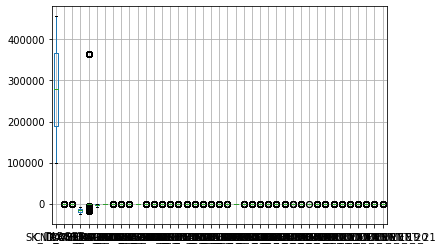

In [128]:
#df.select_dtypes('float64').boxplot()
df.select_dtypes('int64').boxplot()

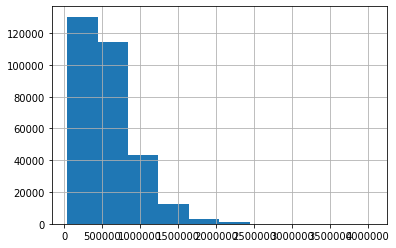

In [126]:
#df['AMT_GOODS_PRICE'].iloc[:500].plot()
df['AMT_GOODS_PRICE'].hist()

In [121]:
df.select_dtypes('int64').head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,0,-9461,-637,-2120,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,-16765,-1188,-291,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,0,-19046,-225,-2531,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,-19005,-3039,-2437,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,-19932,-3038,-3458,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df.select_dtypes('object').head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business Entity Type 3
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,MONDAY,School
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,WEDNESDAY,Business Entity Type 3
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,THURSDAY,Religion


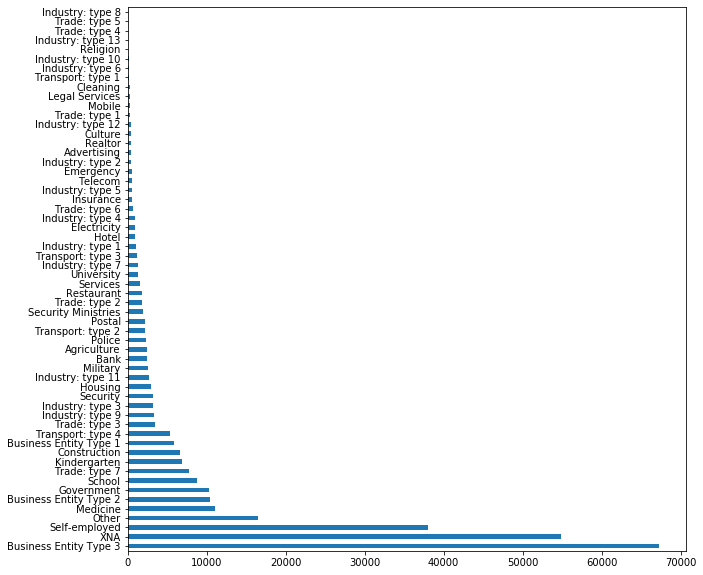

In [118]:
df['ORGANIZATION_TYPE'].value_counts().plot.barh(figsize=(10,10))

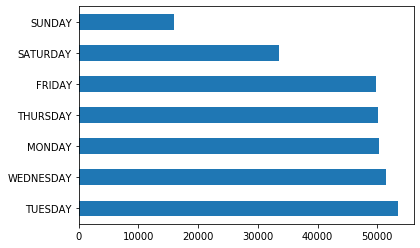

In [116]:
df['WEEKDAY_APPR_PROCESS_START'].value_counts().plot.barh()

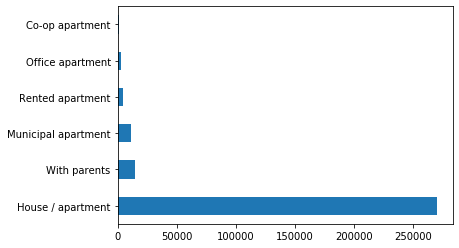

In [115]:
df['NAME_HOUSING_TYPE'].value_counts().plot.barh()

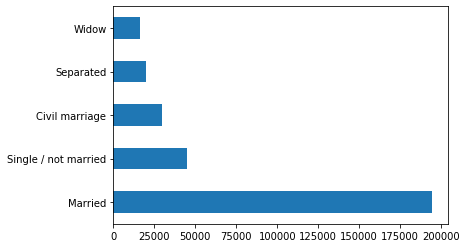

In [114]:
df['NAME_FAMILY_STATUS'].value_counts().plot.barh()

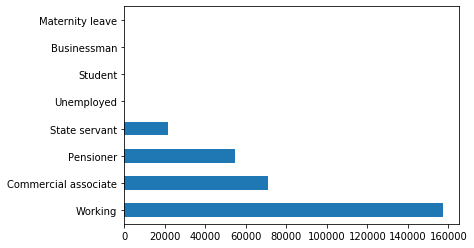

In [113]:
df['NAME_INCOME_TYPE'].value_counts().plot.barh()

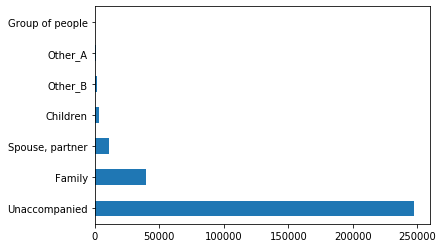

In [112]:
df['NAME_TYPE_SUITE'].value_counts().plot.barh()

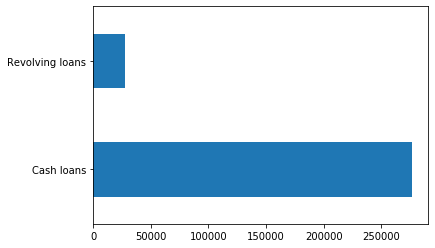

In [111]:
df['NAME_CONTRACT_TYPE'].value_counts().plot.barh()

In [54]:
# 차 연식
mean_age = df['OWN_CAR_AGE'].dropna().mean() # 왜 12살: 자동차 연식
df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].fillna(mean_age)
mean_age

12.06109081865161

EDA (Explorer Data Analysis 탐색적 데이터 분석)

In [8]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
df.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [13]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
12 * 160

1920

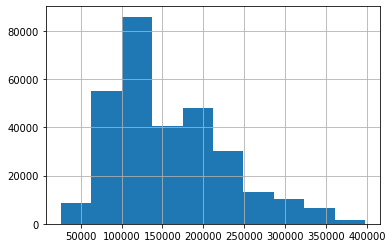

In [30]:
# 수입이 적은 사람들만 보자. 조건부 검색
# 데이터[조건]
cond = df['AMT_INCOME_TOTAL'] < 0.4 * 1e6
df['AMT_INCOME_TOTAL'][cond].hist()
#15만 위안 , 1위안 = 160 원  

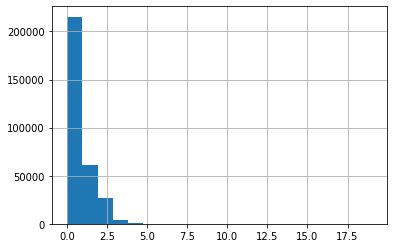

In [24]:
df['CNT_CHILDREN'].hist(bins=20)

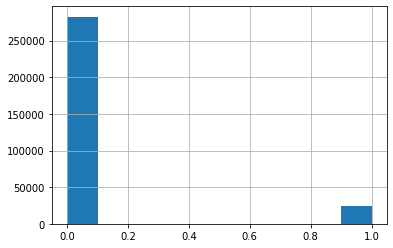

In [15]:
%matplotlib inline
df['TARGET'].hist()

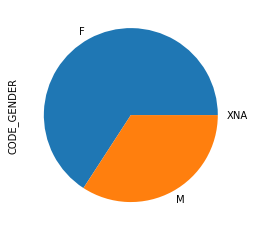

In [20]:
df['CODE_GENDER'].value_counts().plot.pie()

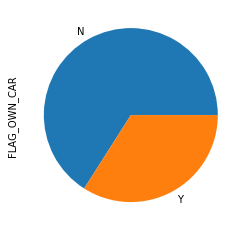

In [21]:
df['FLAG_OWN_CAR'].value_counts().plot.pie()

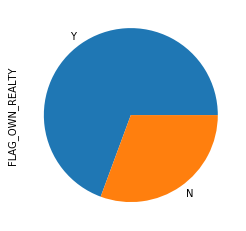

In [22]:
df['FLAG_OWN_REALTY'].value_counts().plot.pie()

In [170]:
df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
SK_ID_CURR,1.000000,-0.002170,-0.001453,-0.001761,-0.000202,-0.000235,-0.000208,0.000944,-0.001507,0.001551,...,-0.001050,0.000877,-0.000991,0.002073,-0.000513,0.000996,0.000025,0.000356,0.000683,0.000322
TARGET,-0.002170,1.000000,0.019236,-0.003625,-0.030335,-0.012630,-0.039549,-0.036997,0.078636,-0.045168,...,-0.000761,-0.011636,-0.009890,-0.006063,-0.011824,-0.003327,-0.007864,-0.001595,0.000416,0.003919
CNT_CHILDREN,-0.001453,0.019236,1.000000,0.013098,0.002258,0.021813,-0.001809,-0.025483,0.331533,-0.239764,...,0.000294,0.003807,-0.005428,0.003661,0.009864,0.000457,0.003174,0.000569,0.001023,-0.002437
AMT_INCOME_TOTAL,-0.001761,-0.003625,0.013098,1.000000,0.155278,0.189891,0.157972,0.073462,0.027278,-0.064155,...,0.002546,0.022596,0.020414,0.010123,0.007011,0.002309,0.003078,0.002447,0.000364,-0.000528
AMT_CREDIT,-0.000202,-0.030335,0.002258,0.155278,1.000000,0.769209,0.986975,0.099842,-0.056261,-0.066471,...,0.003876,0.051418,0.048023,0.031075,0.060601,0.010758,0.033723,0.020747,0.030016,-0.015981
AMT_ANNUITY,-0.000235,-0.012630,0.021813,0.189891,0.769209,1.000000,0.774273,0.118390,0.009874,-0.104776,...,0.000845,0.024636,0.036511,0.014714,0.007270,0.002601,-0.009825,0.004547,0.011177,-0.017387
AMT_GOODS_PRICE,-0.000208,-0.039549,-0.001809,0.157972,0.986975,0.774273,1.000000,0.103519,-0.054548,-0.064337,...,0.004088,0.051338,0.048248,0.031706,0.057197,0.011207,0.032337,0.019960,0.030659,-0.014467
REGION_POPULATION_RELATIVE,0.000944,-0.036997,-0.025483,0.073462,0.099842,0.118390,0.103519,1.000000,-0.029743,-0.004343,...,-0.000401,0.031455,0.030566,0.008283,0.006318,0.007377,0.013503,0.002930,-0.000287,0.002746
DAYS_BIRTH,-0.001507,0.078636,0.331533,0.027278,-0.056261,0.009874,-0.054548,-0.029743,1.000000,-0.615937,...,0.000239,0.025790,0.029947,0.012843,0.023356,0.007820,0.043653,0.002977,0.008449,0.027038
DAYS_EMPLOYED,0.001551,-0.045168,-0.239764,-0.064155,-0.066471,-0.104776,-0.064337,-0.004343,-0.615937,1.000000,...,-0.001232,-0.025341,-0.022835,-0.013663,-0.041622,-0.007118,-0.039608,-0.009815,-0.010009,-0.008314


In [174]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [176]:
df_x = df.drop(columns=['TARGET','SK_ID_CURR','FLAG_MOBIL'])
df_y = df['TARGET']
df_x.shape, df_y.shape

((304531, 62), (304531,))

In [183]:
import numpy as np
x = np.array(pd.get_dummies(df_x)).astype(np.float32)
y = np.array(df_y).reshape([-1, 1]).astype(np.float32)
x.shape, y.shape, x.dtype, y.dtype, y.mean() #클래스 불균형 현상 

((304531, 156), (304531, 1), dtype('float32'), dtype('float32'), 0.08099996)

In [184]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression().fit(x,y)
model.score(x,y)

In [187]:
from sklearn.metrics import classification_report

In [190]:
report = classification_report(y, model.predict(x))
print(report) # precision 정밀도, recall 재현율 ,f1 : 정밀도와 재현율의 조화평균

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96    279864
         1.0       0.00      0.00      0.00     24667

    accuracy                           0.92    304531
   macro avg       0.46      0.50      0.48    304531
weighted avg       0.84      0.92      0.88    304531



In [192]:
m = 1000
from sklearn.preprocessing import StandardScaler #평균 0, 분산 1 로 정규화
xn = x[:m]
yn = y[:m]
scaler = StandardScaler()

In [194]:
scaler.fit(xn)
xn = scaler.transform(xn)
np.min(xn),np.mean(xn), np.max(xn) # 이상치 때문에 최소 최대값이 너무 크거나 작다.

(-18.230011, 4.4015738e-10, 31.60696)

In [211]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
tf.reset_default_graph()
net = slim.fully_connected(xn, 10)
h = slim.fully_connected(net, 1, activation_fn=tf.nn.sigmoid)
cost = tf.reduce_mean((yn - h)**2)  # MSE > CE 가 원래는 맞습니다.
#cost=tf.reduce_mean(tf.losses.sparse_softmax_cross_entropy(label=tf.cast(yn, tf.int64), logits=h))
train = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
for i in range(10000): 
    sess.run(train)
    if i%1000==0:
        print(i, sess.run(cost))

In [216]:
p = np.round(sess.run(h))
print(classification_report(yn, p))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       929
         1.0       1.00      0.87      0.93        71

    accuracy                           0.99      1000
   macro avg       1.00      0.94      0.96      1000
weighted avg       0.99      0.99      0.99      1000

